<a href="https://colab.research.google.com/github/whosphong/DATA-STRUCTURES-AND-PLATFORMS---UAmath509/blob/main/509_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winter 2025 MATH 509 PROJECT

- Phong Ho
- Michael Zhang
- R.J. Bilak
- Edmond Tuong

------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# EDA

In [44]:
data = 'https://raw.githubusercontent.com/whosphong/DATA-STRUCTURES-AND-PLATFORMS---UAmath509/refs/heads/main/google_review_ratings.csv'
df = pd.read_csv(data)

In [45]:
df.head(20)
df.tail(20)

df.drop(columns=['User', 'Unnamed: 25'], inplace=True)

In [46]:
## Checking types of Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5454 non-null   float64
 1   Category 2   5454 non-null   float64
 2   Category 3   5454 non-null   float64
 3   Category 4   5454 non-null   float64
 4   Category 5   5454 non-null   float64
 5   Category 6   5454 non-null   float64
 6   Category 7   5454 non-null   float64
 7   Category 8   5454 non-null   float64
 8   Category 9   5454 non-null   float64
 9   Category 10  5454 non-null   float64
 10  Category 11  5454 non-null   float64
 11  Category 12  5454 non-null   float64
 12  Category 13  5454 non-null   float64
 13  Category 14  5454 non-null   float64
 14  Category 15  5454 non-null   float64
 15  Category 16  5454 non-null   float64
 16  Category 17  5454 non-null   float64
 17  Category 18  5454 non-null   float64
 18  Category 19  5454 non-null   float64
 19  Catego

In [47]:
df.describe()

Category 1   Category 2   Category 3   Category 4   Category 5  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000   
mean      1.455746     2.320048     2.489059     2.797103     2.958904   
std       0.827732     1.421576     1.247503     1.309188     1.338785   
min       0.000000     0.000000     0.000000     0.830000     1.120000   
25%       0.920000     1.360000     1.540000     1.730000     1.770000   
50%       1.340000     1.910000     2.060000     2.460000     2.670000   
75%       1.810000     2.687500     2.740000     4.097500     4.310000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

        Category 6   Category 7   Category 8   Category 9  Category 10  ...  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000  ...   
mean      2.893423     3.351476     2.541177     3.126542     2.832695  ...   
std       1.282101     1.413291     1.111398     1.356774     1.307299  ...   
min       1.110000     1.120000     0.860000     0.840000     0.810000  ...   
25%       1.790000     1.930000     1.620000     1.800000     1.640000  ...   
50%       2.680000     3.230000     2.170000     2.800000     2.680000  ...   
75%       3.837500     5.000000     3.190000     5.000000     3.527500  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

       Category 15  Category 16  Category 17  Category 18  Category 19  \
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000   
mean      2.206140     1.192710     0.949349     0.822525     0.969250   
std       1.715848     1.107176     0.973628     0.948015     1.202883   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.860000     0.690000     0.580000     0.530000     0.520000   
50%       1.330000     0.800000     0.740000     0.690000     0.690000   
75%       4.440000     1.160000     0.910000     0.840000     0.860000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Category 20  Category 21  Category 22  Category 23  Category 24  
count  5454.000000  5454.000000  5454.000000  5454.000000  5454.000000  
mean      0.999626     0.965275     1.749345     1.531051     1.560570  
std       1.193129     0.928326     1.597816     1.316180     1.171784  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.540000     0.570000     0.740000     0.790000     0.880000  
50%       0.690000     0.760000     1.030000     1.070000     1.290000  
75%       0.860000     1.000000     2.070000     1.560000     1.660000  
max       5.000000     5.000000     5.000000     5.000000     5.000000  

[8 rows x 24 columns]

In [48]:
df = df.rename(columns = {
    "Category 1": "churches", 
    "Category 2": "resorts", 
    "Category 3": "beaches", 
    "Category 4": "parks", 
    "Category 5": "theatres",
    "Category 6": "museums", 
    "Category 7": "malls", 
    "Category 8": "zoos", 
    "Category 9": "restaurants", 
    "Category 10": "pubs", 
    "Category 11": "services", 
    "Category 12": "pizzerias", 
    "Category 13": "hotels", 
    "Category 14": "refreshments", 
    "Category 15": "galleries", 
    "Category 16": "clubs", 
    "Category 17": "pools", 
    "Category 18": "gyms", 
    "Category 19": "bakeries", 
    "Category 20": "spas", 
    "Category 21": "cafes", 
    "Category 22": "panorama", 
    "Category 23": "monuments", 
    "Category 24": "gardens"
}).copy()


Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

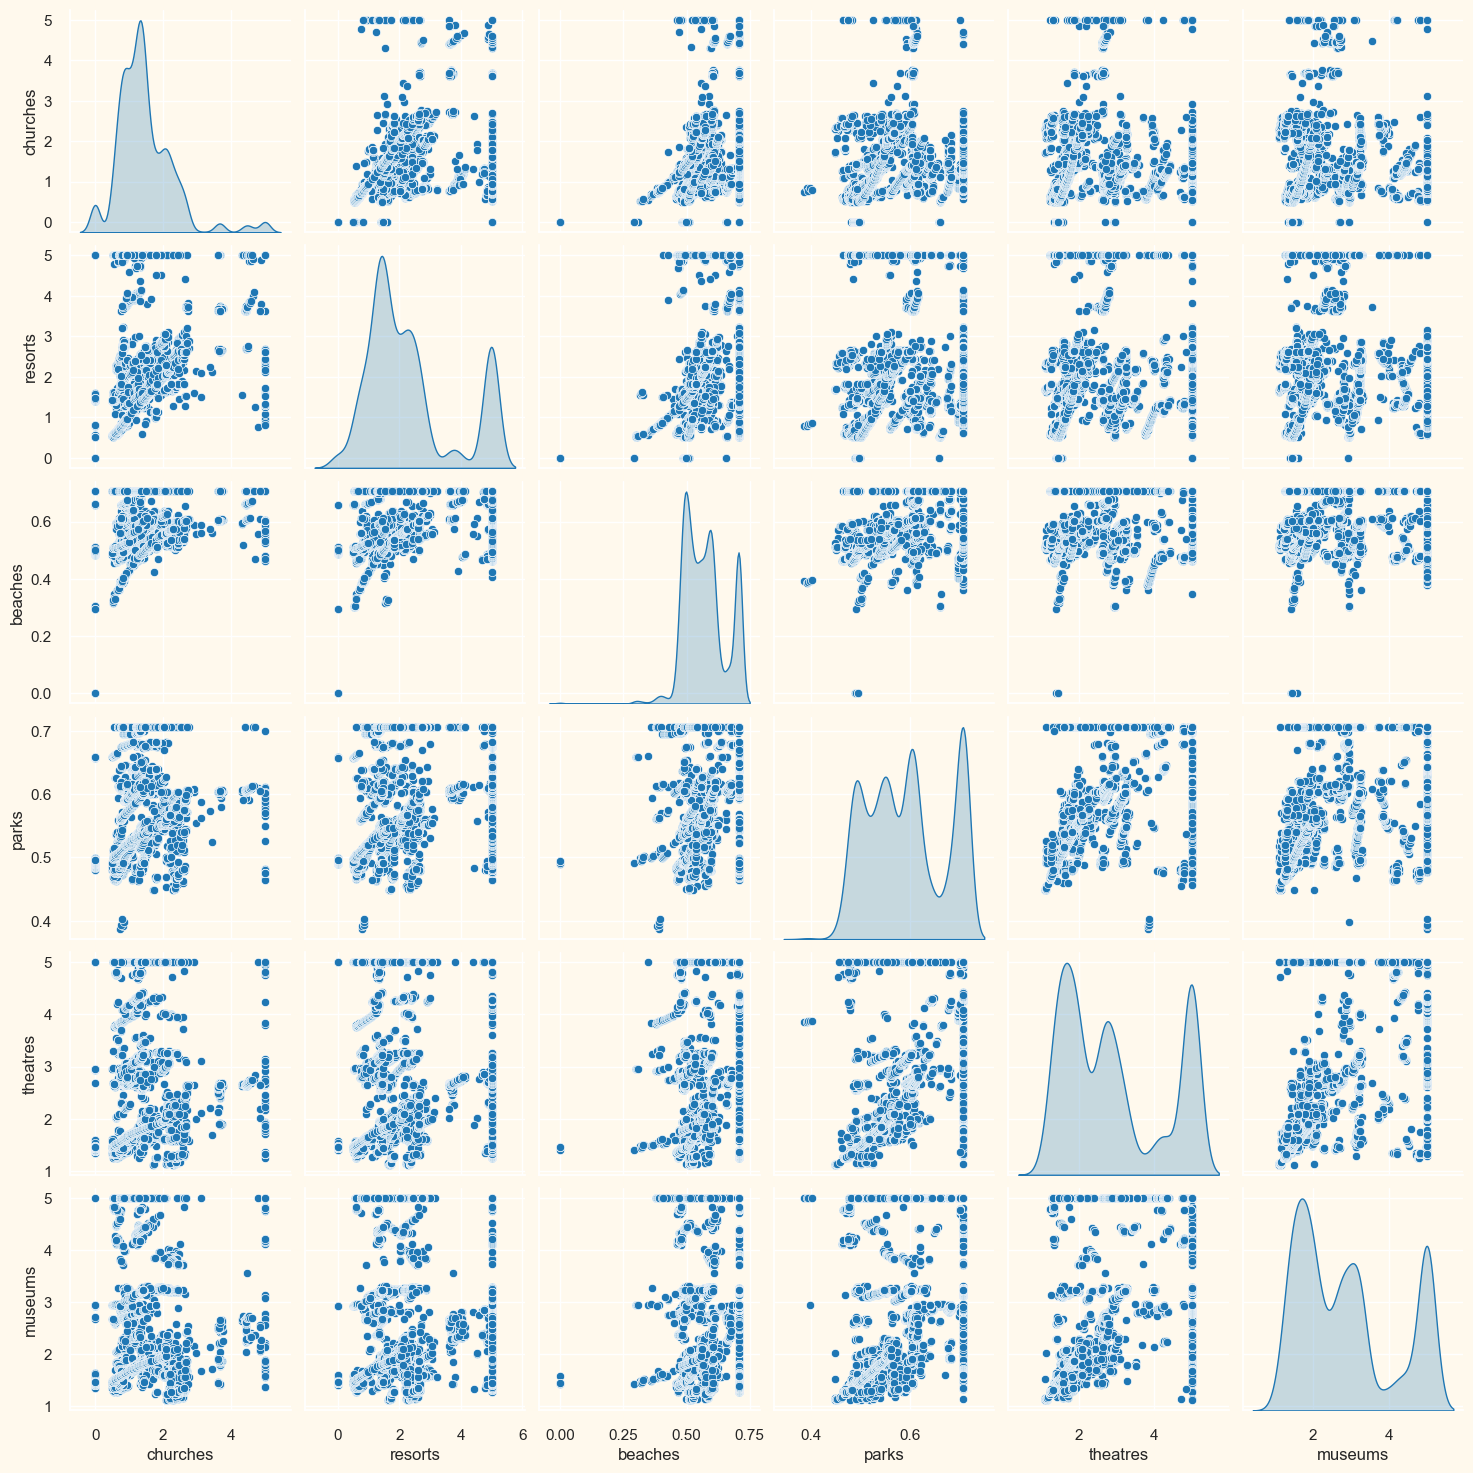

In [108]:
# Define custom color palette
palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]

# Set the palette
sns.set_palette(palette)

# Define the columns to plot
To_Plot = ["churches", "resorts", "beaches", "parks", "theatres", "museums"]

# Print the action
print("Relative Plot Of Some Selected Features: A Data Subset")

# Create pairplot with KDE on the diagonals and custom color palette
plt.figure()
sns.pairplot(df[To_Plot], diag_kind="kde")  # KDE on diagonals
plt.show()


In [ ]:
df.isna().sum() ## None

dup_df = df[df.duplicated(keep=False)] ## Indicates 2 == 4, 670 == 674, 1338 == 1346
dup_df

df.drop_duplicates(inplace=True)


# How unlikely is this actually? The data is all in rational numbers so it is not impossible for 2 different people to get exactly the same result.

#df.iloc[[4,674,1346],:] ## Does not show any duplicates

Empty DataFrame
Columns: [churches, resorts, beaches, parks, theatres, museums, malls, zoos, restaurants, pubs, services, pizzerias, hotels, juicebars, galleries, clubs, pools, gyms, bakeries, spas, cafes, panorama, monuments, gardens]
Index: []

[0 rows x 24 columns]

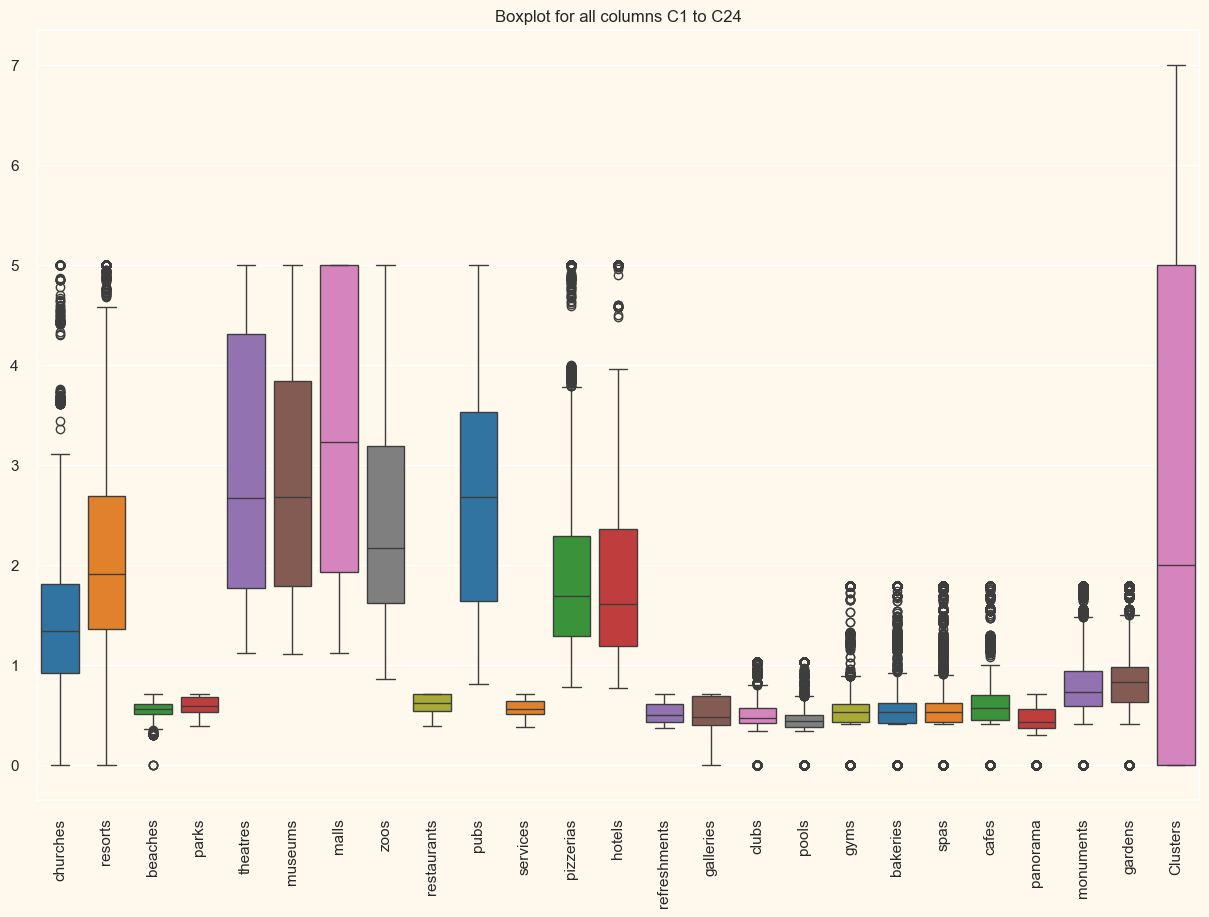

In [110]:
plt.figure(figsize=(15, 10))

# Create the boxplot with the custom palette
sns.boxplot(data=df, palette=palette)  # Use 'palette' instead of 'pallet'

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title
plt.title('Boxplot for all columns C1 to C24')

# Show the plot
plt.show()


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] ## Removing Outliers

churches       0.8900
resorts        1.3275
beaches        1.2000
parks          2.3675
theatres       2.5400
museums        2.0475
malls          3.0700
zoos           1.5700
restaurants    3.2000
pubs           1.8875
services       1.6375
pizzerias      0.9975
hotels         1.1700
juicebars      1.7100
galleries      3.5800
clubs          0.4700
pools          0.3300
gyms           0.3100
bakeries       0.3400
spas           0.3200
cafes          0.4300
panorama       1.3300
monuments      0.7700
gardens        0.7800
dtype: float64


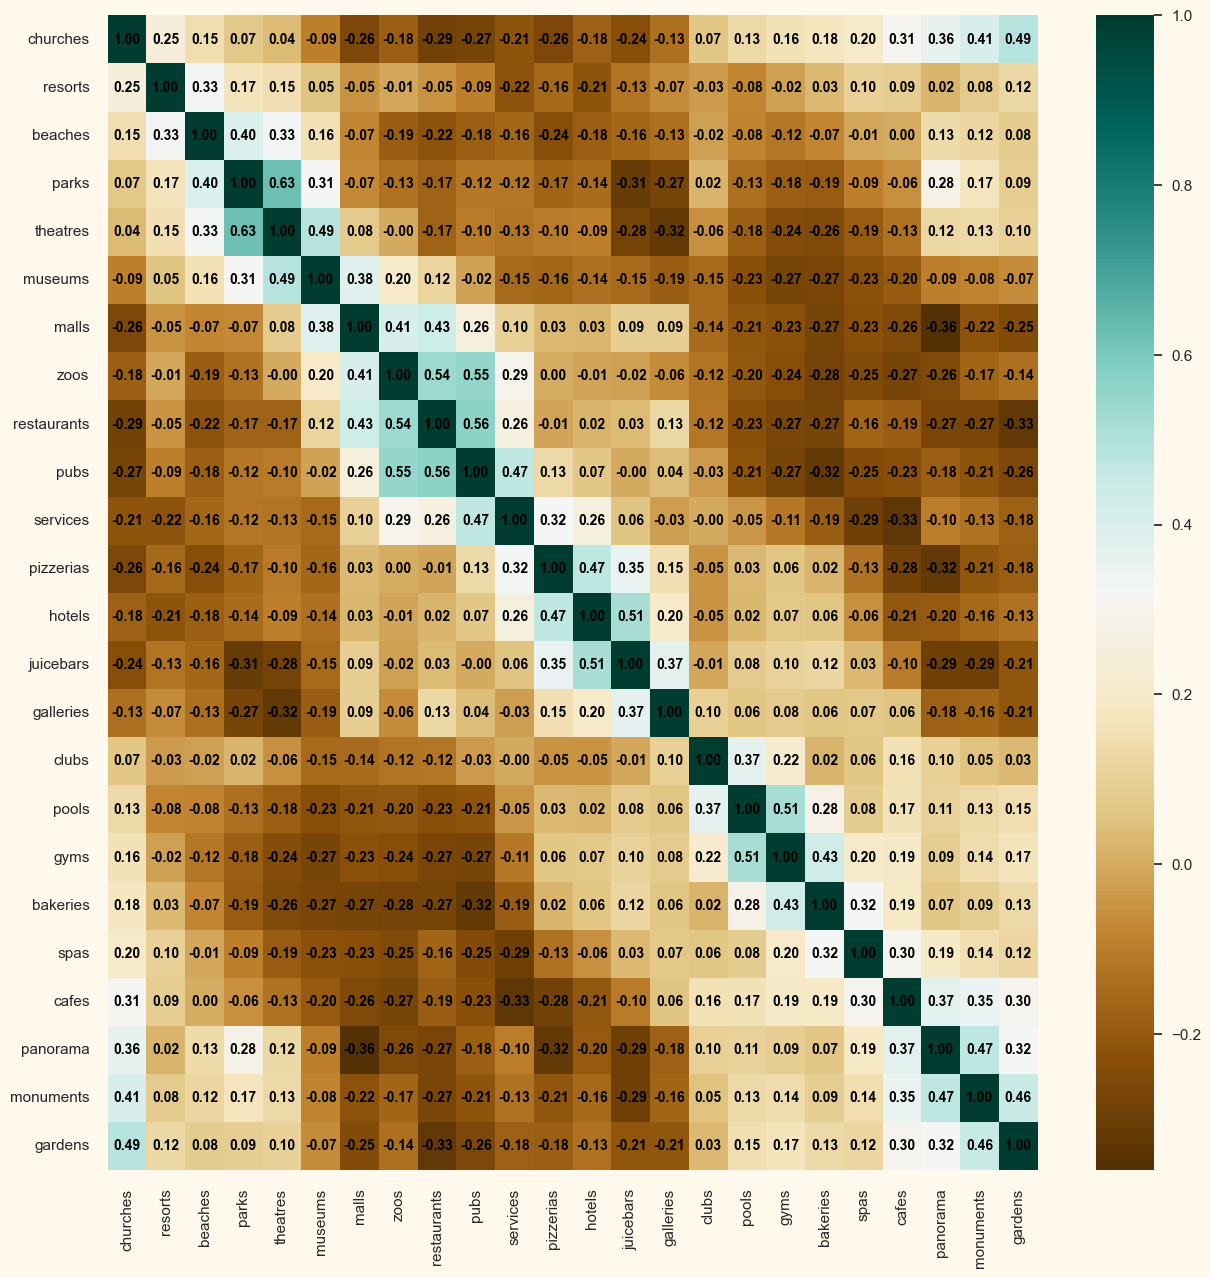

In [ ]:
plt.figure(figsize=(15, 15))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True, fmt=".2f", annot_kws={"size": 10, "weight": "bold", "color": "black"})
plt.show()

In [12]:
c[c==1] = 0
maxcorrs = pd.DataFrame()
maxcorrs["Max Correlation"] = np.max(abs(c), axis=0)
maxcorrs["With"] = np.argmax(abs(c), axis=0)+1
maxcorrs

# Correlations seem not high enough to justify removing any

Max Correlation  With
churches            0.489249    24
resorts             0.325429     3
beaches             0.396694     4
parks               0.626787     5
theatres            0.626787     4
museums             0.489528     5
malls               0.432183     9
zoos                0.551613    10
restaurants         0.564442    10
pubs                0.564442     9
services            0.469282    10
pizzerias           0.470310    13
hotels              0.512732    14
juicebars           0.512732    13
galleries           0.370679    14
clubs               0.371382    17
pools               0.513715    18
gyms                0.513715    17
bakeries            0.425764    18
spas                0.319982    19
cafes               0.374571    22
panorama            0.471657    23
monuments           0.471657    22
gardens             0.489249     1

In [37]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

# TSNE

d:\anaconda3\envs\dsci\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


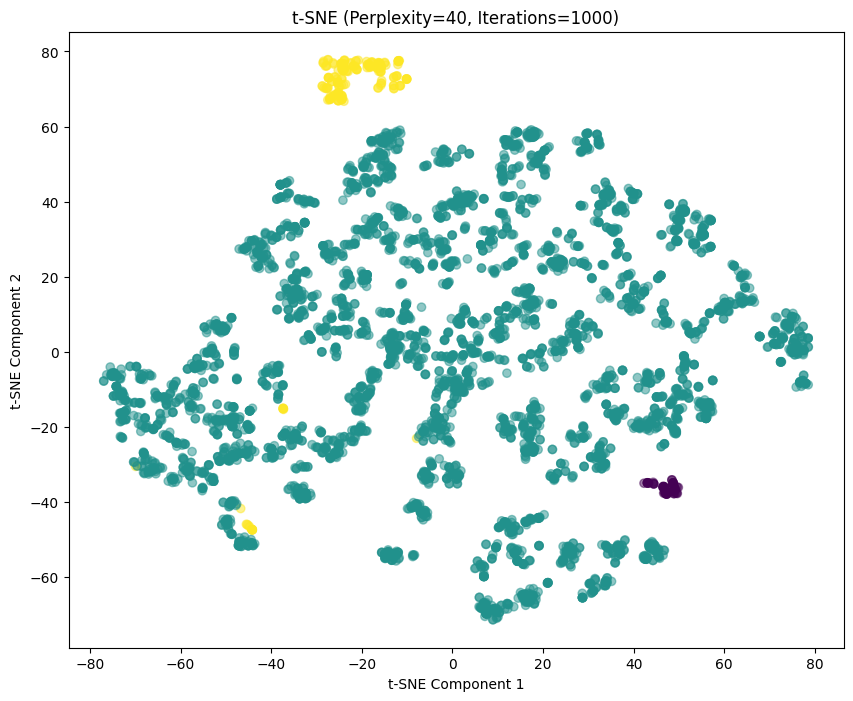

In [43]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame with ratings data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # Normalize the data

target = df['Average']

# Define function to plot t-SNE with custom perplexity and iterations
def plot_tsne(perplexity_value, n_iter_value):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value, n_iter=n_iter_value)
    tsne_results = tsne.fit_transform(scaled_df)

    # Plotting the results
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5, c=target, cmap='viridis')
    plt.title(f't-SNE (Perplexity={perplexity_value}, Iterations={n_iter_value})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Experimenting with different values of perplexity and iterations
plot_tsne(perplexity_value=40, n_iter_value=1000)  # Low perplexity


Perplexity can be thought of as a parameter that defines the number of nearest neighbors to consider when computing pairwise similarities in the data. It essentially determines the scale of the neighborhoods that t-SNE tries to preserve in the low-dimensional space.
Low perplexity (e.g., 5-20) focuses on local structures (i.e., nearby points) and may highlight more detailed, smaller clusters.
High perplexity (e.g., 30-50) focuses more on global structures, taking into account broader neighborhoods in the data. This can help capture larger patterns and reduce the noise of small clusters.
perplexity: Decides kind of how many neighbors to be considered. Value should be within 5 and 50. Larger datsets have realtively large perplexity value.



This parameter defines how many iterations t-SNE should run to minimize the cost function. The more iterations you use, the more likely t-SNE is to converge to a stable solution. However, using too many iterations can lead to overfitting or unnecessary computational expense.
Lower number of iterations may result in a less precise representation of the data, leading to poor convergence or suboptimal clustering.
Higher number of iterations will allow the algorithm to refine the layout and potentially create a better, more stable visualization. However, after a certain number of iterations, the improvement becomes negligible

d:\anaconda3\envs\dsci\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


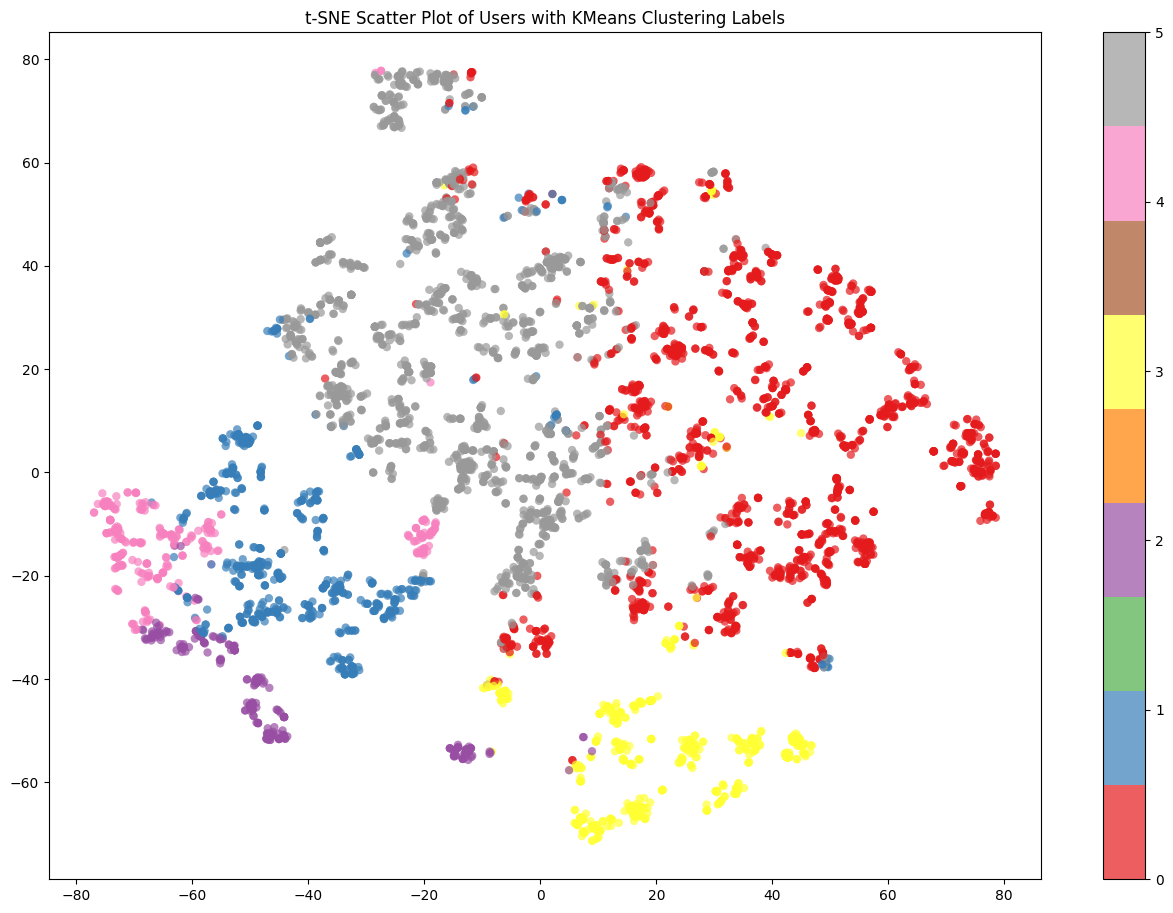

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your user-item matrix (users as rows, attractions as columns)
# Step 1: Standardize the data (exclude labels if they exist, here we assume no labels)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)  # Scale the data (C1 to C24)

# Step 2: Apply t-SNE to reduce the data to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(scaled_df)

# Step 3: Apply KMeans clustering (optional)
# Let's say we want to categorize users into 3 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)  # Labels generated by KMeans

# Step 4: Plotting the t-SNE results with KMeans labels as coloring
plt.figure(figsize=(16, 11))  # Adjust figure size

# Scatter plot with KMeans labels for color
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='Set1', edgecolor="None", alpha=0.7)


# Adding color bar to show scale of the labels
plt.colorbar(scatter)

# Adding title to the plot
plt.title('t-SNE Scatter Plot of Users with KMeans Clustering Labels')

# Show the plot
plt.show()


In [ ]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)  # Assuming df contains attraction names 
print(centroids_df) # Print the centroids of each cluster, average values of each category for each attraction of users in the cluster

         C1        C2        C3        C4        C5        C6        C7  \
0 -0.342995 -0.056982 -0.412576 -0.441196 -0.380737  0.125309  0.626712   
1  0.375107 -0.251962 -0.360316 -0.587653 -0.708992 -0.810275 -0.500835   
2  0.027542  0.188754  0.580825  0.893336  1.066299  0.632920  0.027111   
3 -0.903791 -0.927230 -0.680642 -0.891068 -0.942866 -0.903156 -0.245985   
4  1.074759  0.383791  0.184679 -0.180839 -0.573317 -0.707852 -0.988576   

         C8        C9       C10  ...       C15       C16       C17       C18  \
0  0.865025  0.967813  0.745946  ...  0.141925 -0.210720 -0.312034 -0.319172   
1 -0.528236 -0.634658 -0.561242  ...  0.603535  1.929361  3.538597  2.511036   
2 -0.159641 -0.386524 -0.221831  ... -0.487336 -0.100462 -0.221094 -0.296408   
3 -0.497814 -0.207698  0.062878  ...  0.967530 -0.120262 -0.150730  0.063781   
4 -0.923626 -0.830385 -0.908163  ... -0.083412  0.163506  0.183594  0.488789   

        C19       C20       C21       C22       C23       C24  
0 -0

In [33]:
# Assuming you applied KMeans and stored the labels in `kmeans_labels`

# Number of users in each cluster
cluster_sizes = pd.Series(kmeans_labels).value_counts()
print("Cluster Sizes: \n", cluster_sizes)

Cluster Sizes: 
 11    571
1     424
13    422
9     419
18    382
8     348
0     333
4     322
16    316
2     272
7     269
5     258
14    232
3     183
12    166
17    147
19    139
10    102
15     86
6      63
Name: count, dtype: int64


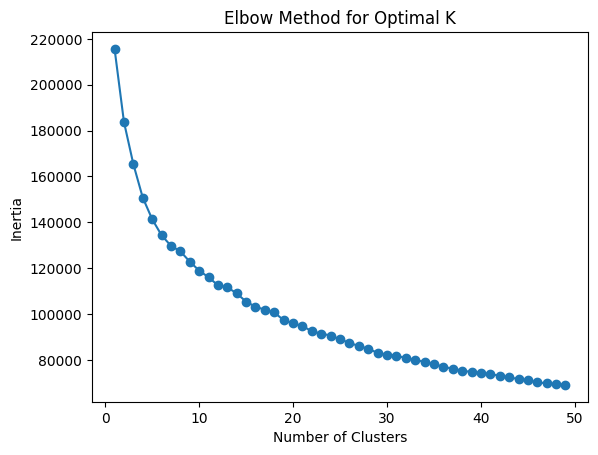

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of K values (number of clusters to test)
k_values = range(1, 50)

# List to store inertia values for each k
inertia_values = []

# Fit KMeans for each k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)  # Assuming df is your data
    inertia_values.append(kmeans.inertia_)

# Plot the inertia for each k
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [16]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [57]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [58]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [59]:
ds = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1, errors='ignore')
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [60]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


churches   resorts  beaches     parks  theatres   museums    malls  \
0 -1.758879 -1.632175  1.07158  0.847430  1.524728  0.020731  1.16655   
1 -1.758879 -1.632175  1.07158  0.847430  1.524728  0.020731  1.16655   
2 -1.758879 -1.632175  1.07158  0.836078  1.524728  0.020731  1.16655   
3 -1.758879 -1.280420  1.07158  0.836078  1.524728  0.020731  1.16655   
4 -1.758879 -1.632175  1.07158  0.836078  1.524728  0.020731  1.16655   

       zoos  restaurants      pubs  ...  galleries     clubs     pools  \
0 -0.172031    -0.370937 -0.147413  ...   0.117855 -0.737292 -0.517668   
1  0.088926    -0.370937 -0.139763  ...   0.117855 -0.737292 -0.517668   
2  0.088926    -0.370937 -0.147413  ...   0.117855 -0.737292 -0.517668   
3 -0.172031    -0.370937 -0.147413  ...   0.117855 -0.737292 -0.517668   
4  0.088926    -0.370937 -0.147413  ...   0.117855 -0.737292 -0.517668   

       gyms  bakeries      spas     cafes  panorama  monuments   gardens  
0 -1.405442 -0.353849 -1.342463 -1.686102 -2.589792  -1.925014 -2.245136  
1 -1.405442 -0.353849 -1.342463 -1.686102 -2.589792  -1.925014 -2.245136  
2 -1.405442 -0.353849 -1.342463 -1.686102 -2.589792  -1.925014 -2.245136  
3 -1.405442 -0.353849 -1.342463 -1.686102 -2.589792  -1.925014 -2.245136  
4 -1.405442 -0.353849 -1.342463 -1.686102 -2.589792  -1.925014 -2.245136  

[5 rows x 24 columns]

In [61]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5454.0 -6.253401e-17  2.314736 -5.146020 -1.735073 -0.407117  1.514591   
col2  5454.0  5.211168e-17  1.925925 -5.975615 -1.219248  0.273146  1.311285   
col3  5454.0 -3.126701e-17  1.371309 -3.963915 -0.960074 -0.103220  0.995297   

           max  
col1  6.595975  
col2  4.716300  
col3  3.503931

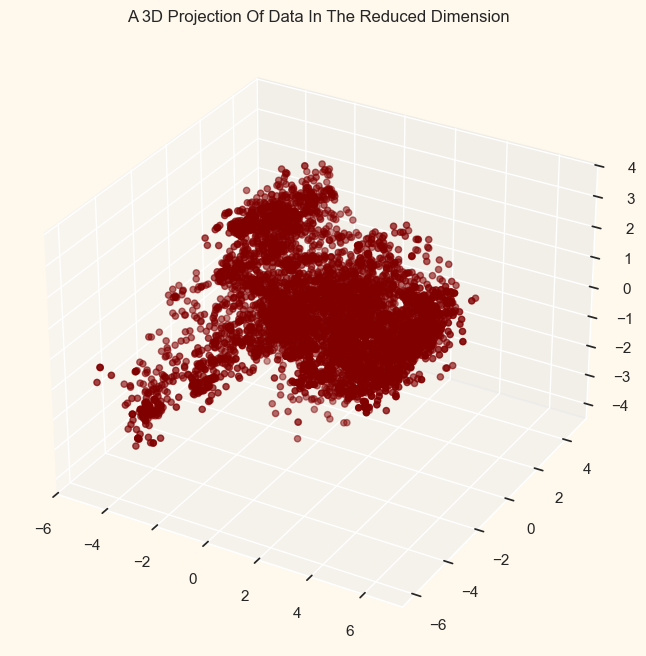

In [112]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


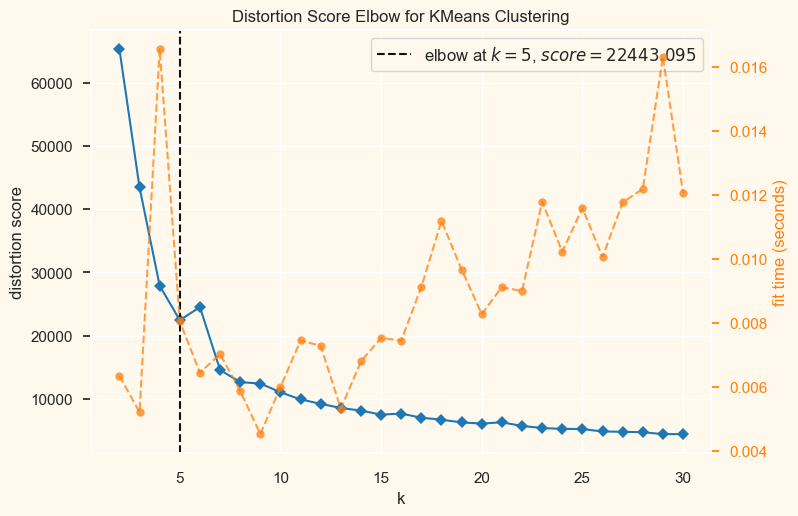

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [111]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=30)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [113]:
# Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=8)
# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds.drop(columns=["Clusters"]))
PCA_ds["Clusters"] = yhat_AC
# Adding the Clusters feature to the original dataframe
df["Clusters"] = yhat_AC

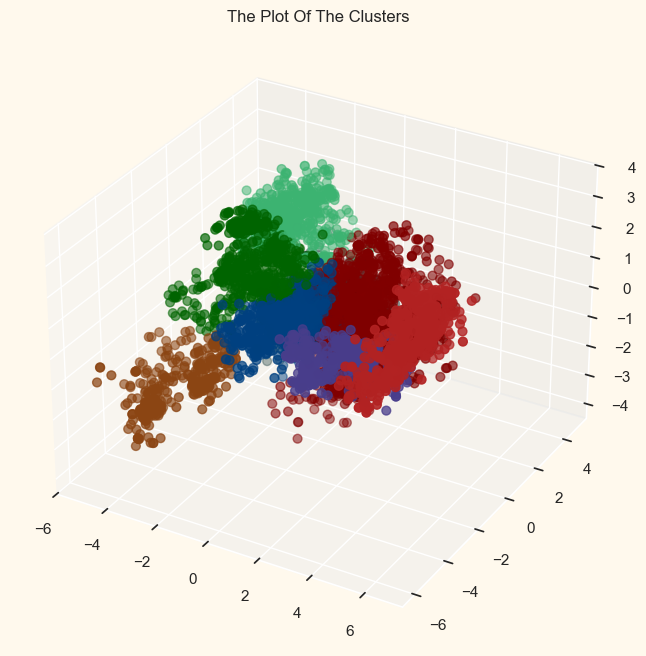

In [127]:

import matplotlib.colors as mcolors

# Define dark, distinct colors as a list (dark red, dark blue, etc.)
dark_colors = ["#800000", "#004080", "#006400", "#8B4513", "#800080", "#B22222", "#2F4F4F", "#3CB371", "#483D8B"]

# Create a colormap using the dark, distinct colors
cmap = mcolors.ListedColormap(dark_colors)

# Plotting 3D scatter
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label="bla")

# Scatter plot with custom colormap
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)

# Set title
ax.set_title("The Plot Of The Clusters")

# Show the plot
plt.show()


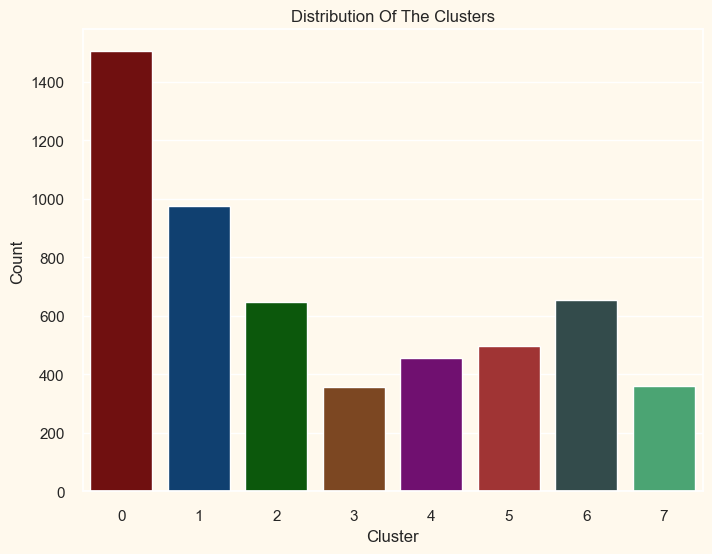

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom set of dark, distinct colors
pal = ["#800000", "#004080", "#006400", "#8B4513", "#800080", "#B22222", "#2F4F4F", "#3CB371", "#483D8B"]

# Create the countplot with dark, distinct colors
plt.figure(figsize=(8, 6))
pl = sns.countplot(x=df["Clusters"], palette=pal)

# Set the title and labels
pl.set_title("Distribution Of The Clusters")
pl.set_xlabel("Cluster")
pl.set_ylabel("Count")

# Show the plot
plt.show()


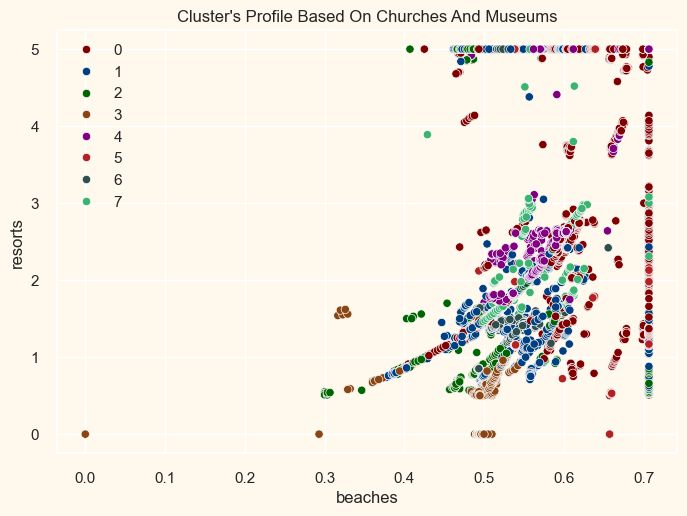

In [129]:
pl = sns.scatterplot(data=df, x="beaches", y="resorts", hue="Clusters", palette=pal)
pl.set_title("Cluster's Profile Based On Churches And Museums")
plt.legend()
plt.show()

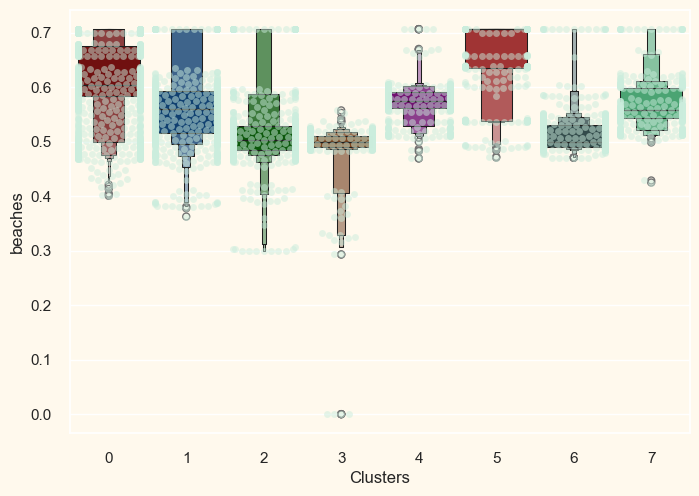

In [131]:
plt.figure()
pl = sns.swarmplot(x=df["Clusters"], y=df["beaches"], color="#CBEDDD", alpha=0.5)
pl = sns.boxenplot(x=df["Clusters"], y=df["beaches"], palette=pal)
plt.show()

<Figure size 800x550 with 0 Axes>

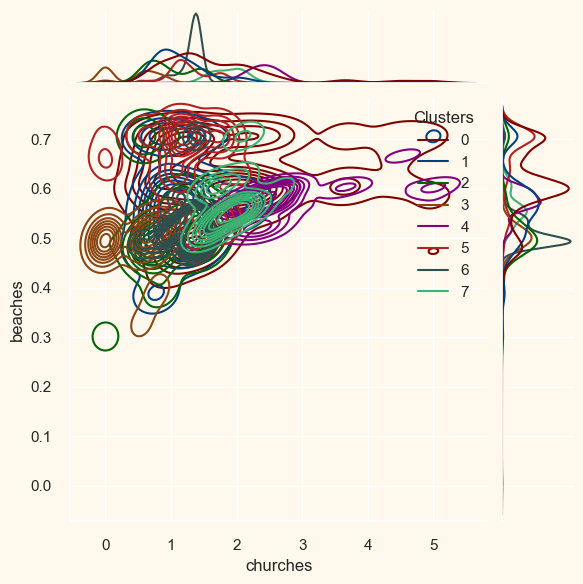

<Figure size 800x550 with 0 Axes>

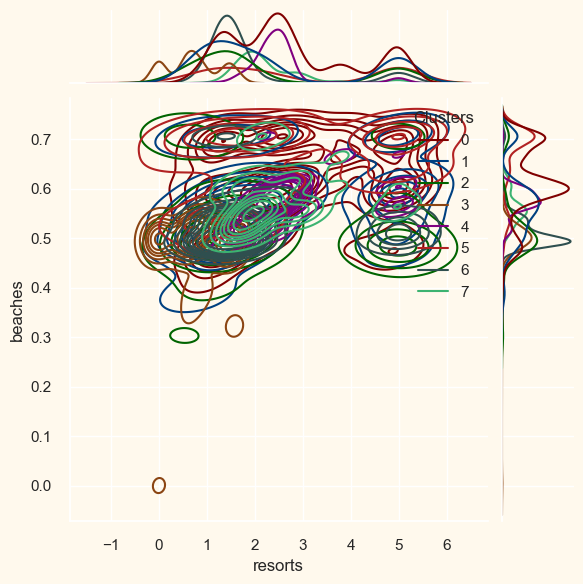

<Figure size 800x550 with 0 Axes>

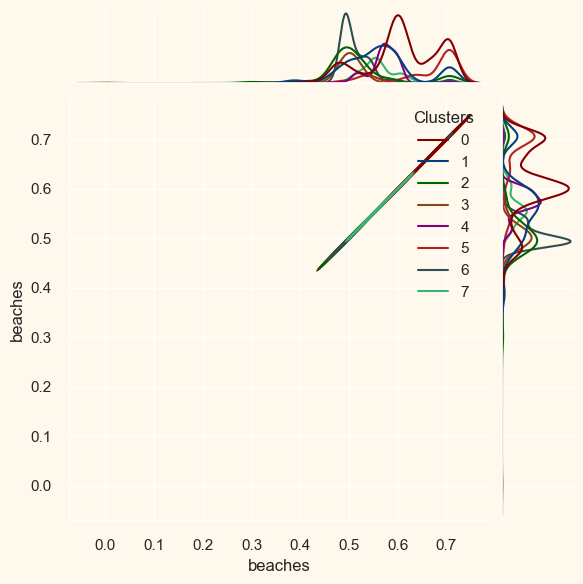

<Figure size 800x550 with 0 Axes>

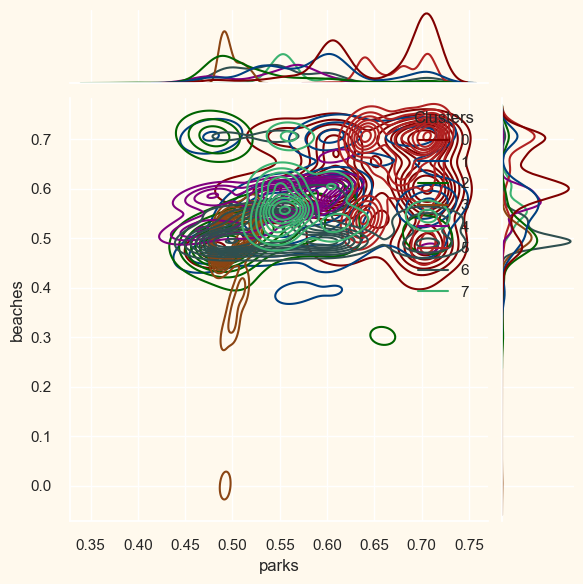

<Figure size 800x550 with 0 Axes>

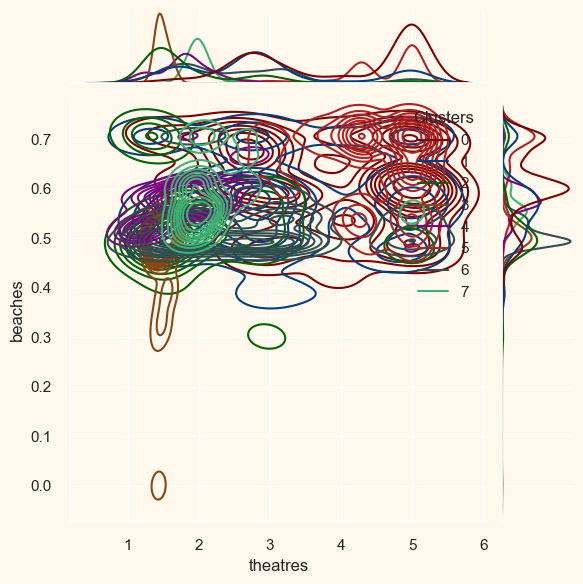

<Figure size 800x550 with 0 Axes>

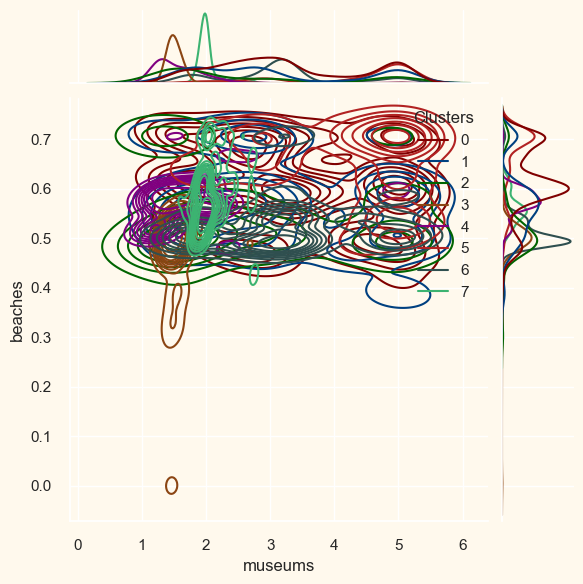

<Figure size 800x550 with 0 Axes>

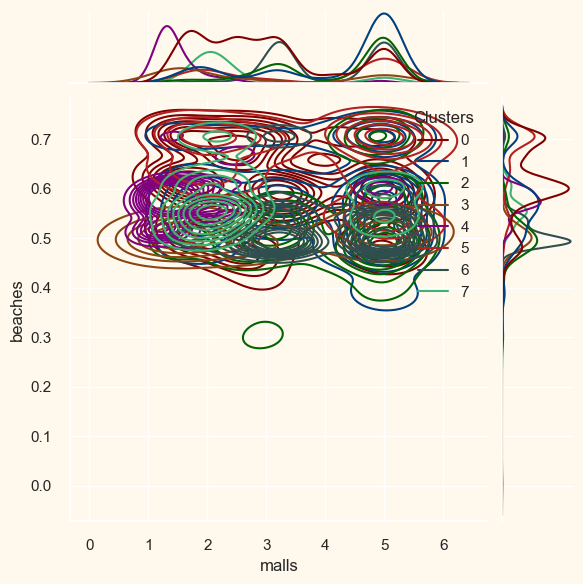

<Figure size 800x550 with 0 Axes>

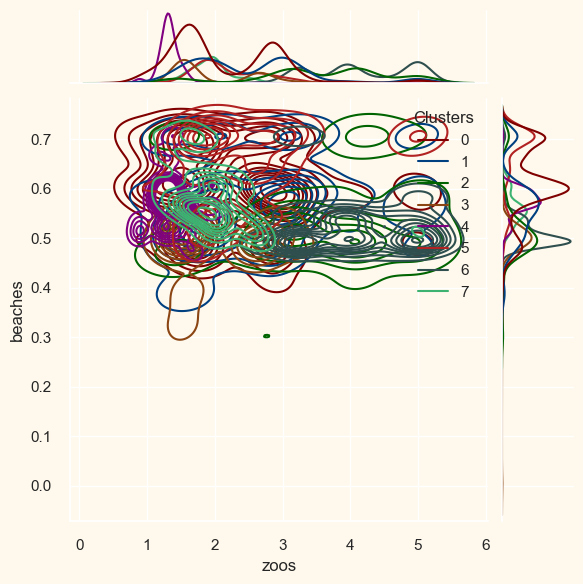

<Figure size 800x550 with 0 Axes>

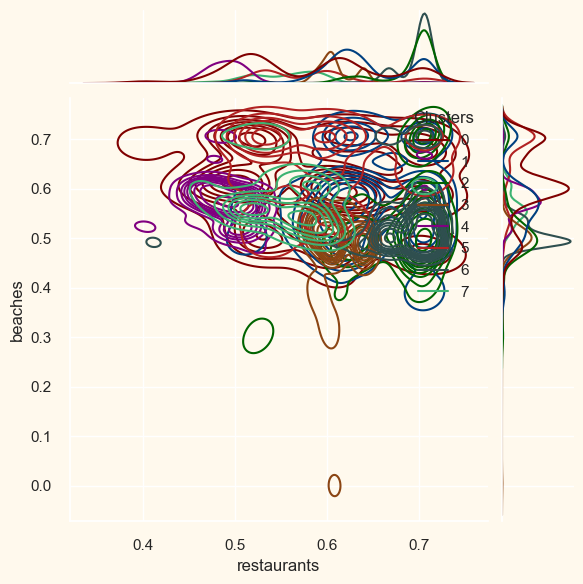

<Figure size 800x550 with 0 Axes>

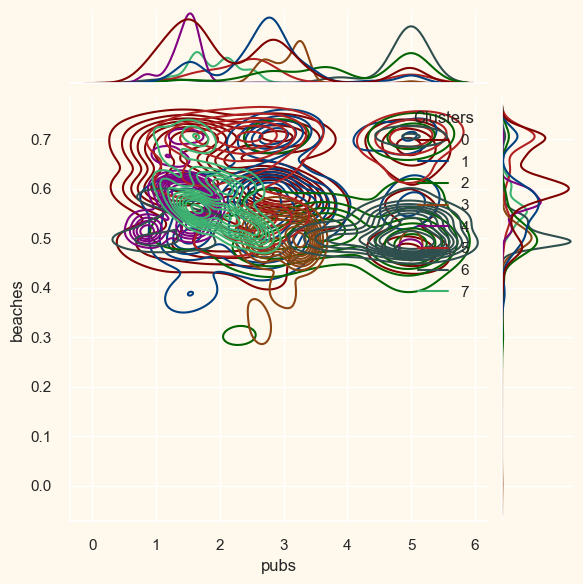

<Figure size 800x550 with 0 Axes>

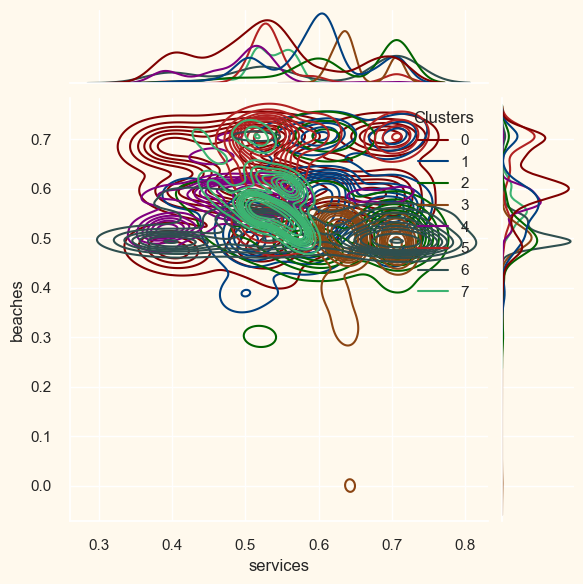

<Figure size 800x550 with 0 Axes>

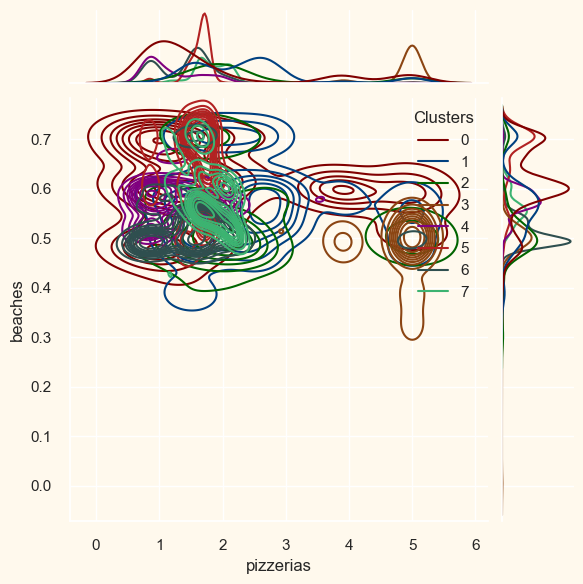

<Figure size 800x550 with 0 Axes>

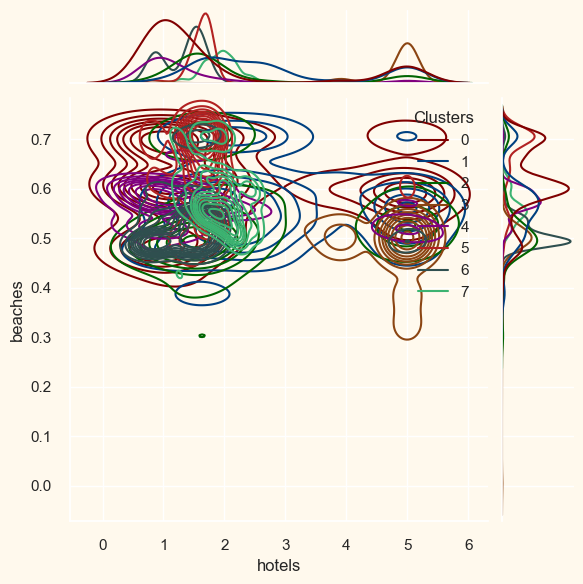

<Figure size 800x550 with 0 Axes>

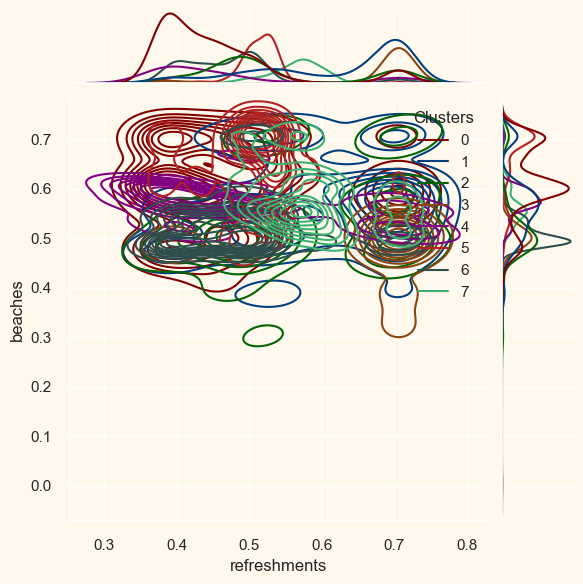

<Figure size 800x550 with 0 Axes>

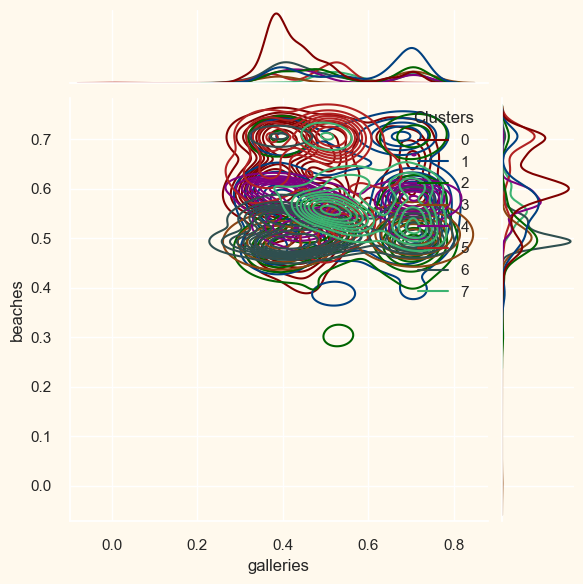

<Figure size 800x550 with 0 Axes>

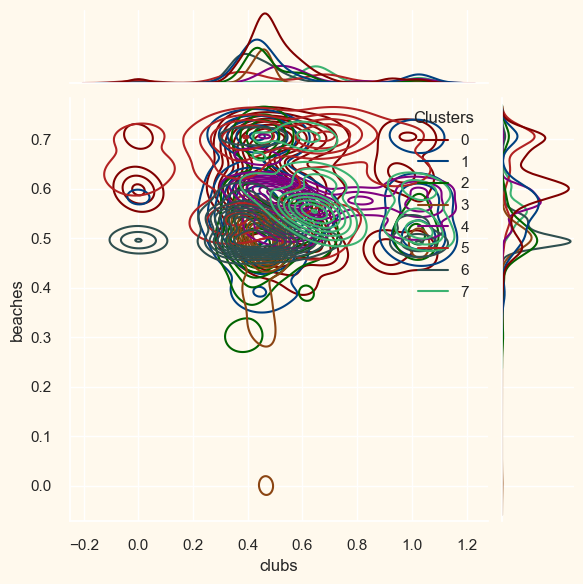

<Figure size 800x550 with 0 Axes>

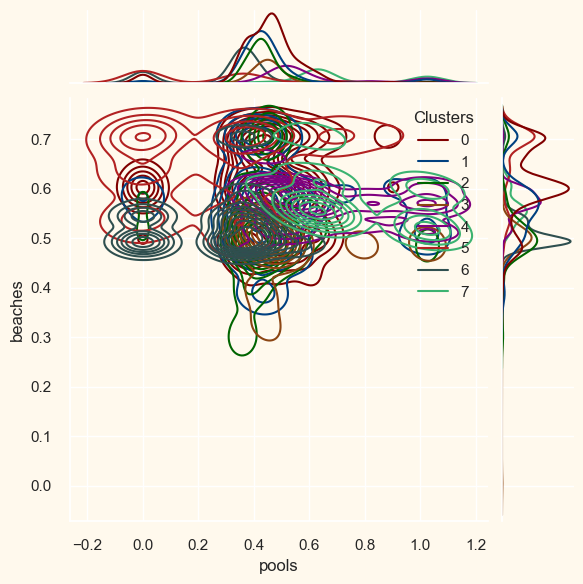

<Figure size 800x550 with 0 Axes>

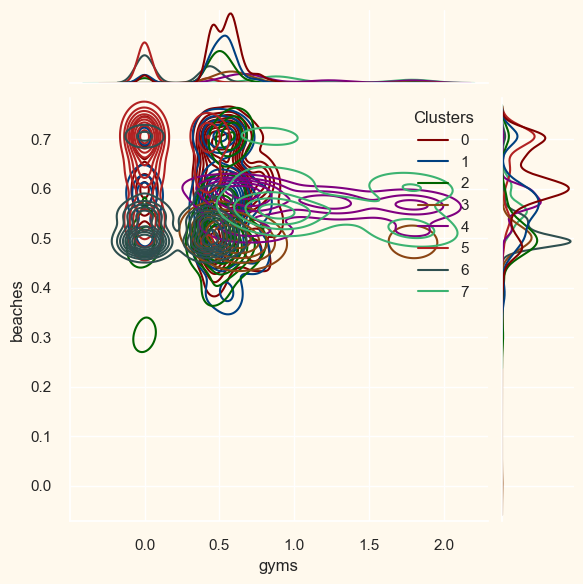

<Figure size 800x550 with 0 Axes>

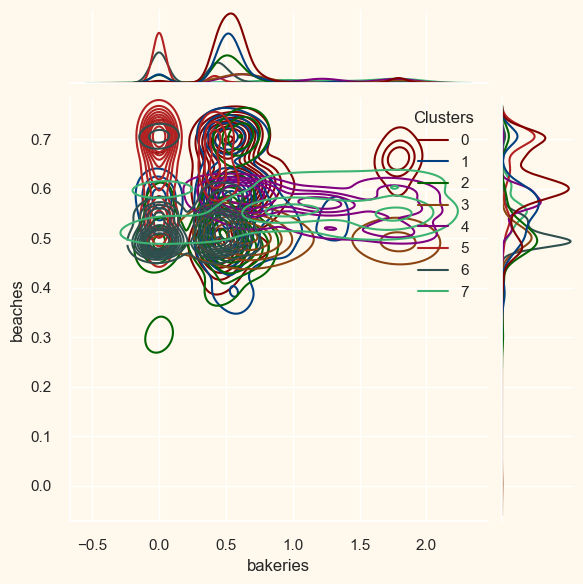

<Figure size 800x550 with 0 Axes>

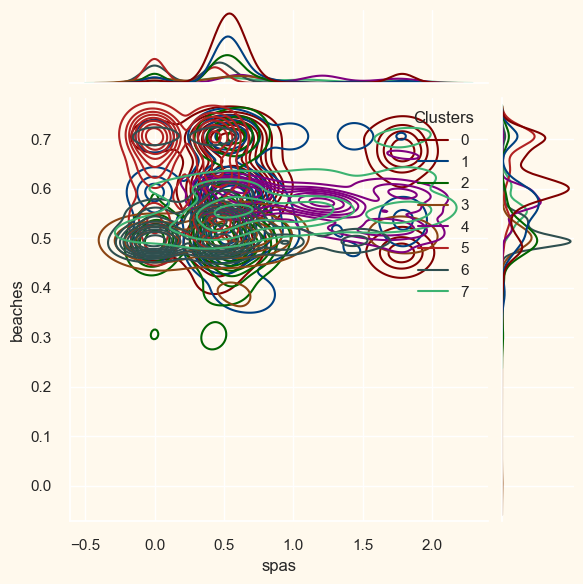

<Figure size 800x550 with 0 Axes>

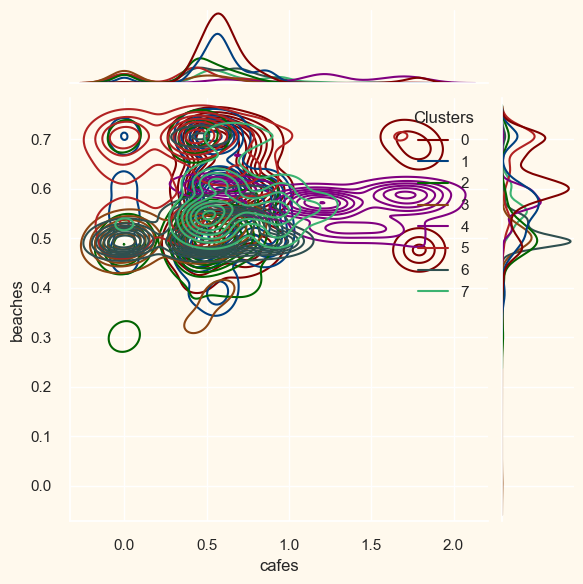

<Figure size 800x550 with 0 Axes>

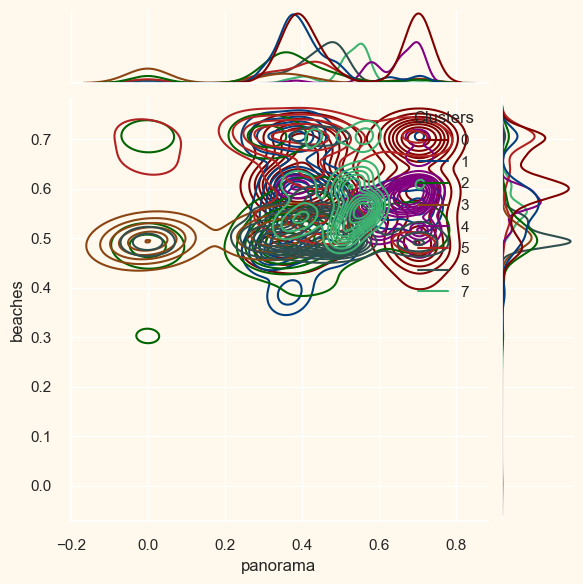

<Figure size 800x550 with 0 Axes>

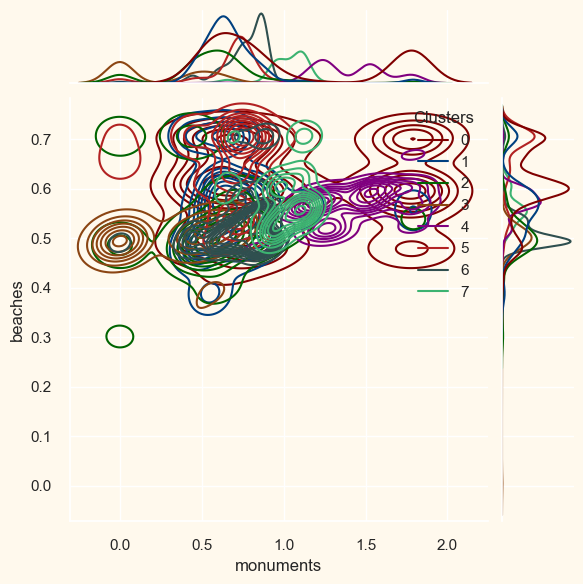

<Figure size 800x550 with 0 Axes>

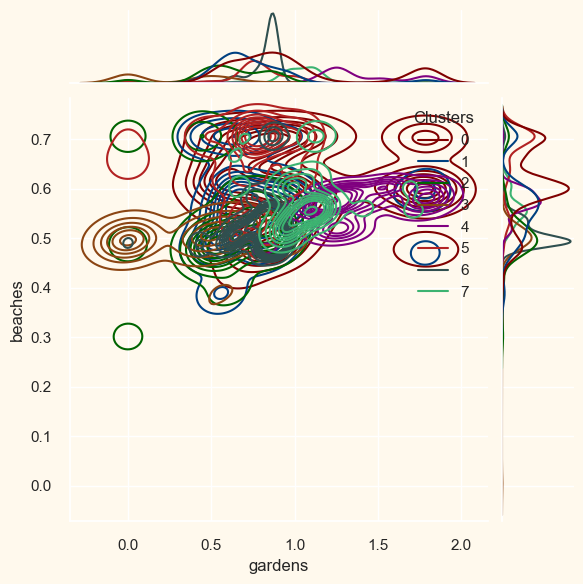

In [133]:
Personal = df.columns[:-1]  # Exclude the 'Clusters' column

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["beaches"], hue=df["Clusters"], kind="kde", palette=pal)
    plt.show()